In [13]:
import pandas as pd

SCALE = {
    'Discordo completamente': 1,
    'Discordo parcialmente': 2,
    'Indiferente': 3,
    'Concordo parcialmente': 4,
    'Concordo completamente': 5,
}

df = pd.read_csv('/root/burnout/BurnoutMetodologia2.csv')

def score(row):
    answers = [row.get('satisfacao', default=0), 
               row.get('abandono', default=0), 
               row.get('animacao', default=0), 
               row.get('descrente potencial', default=0),
               row.get('descrente estudos', default=0),
               row.get('possui dificuldade', default=0)]

    answered = len(answers)-answers.count(0)
    raw_score = sum(answers)
    score = ((raw_score - answered)/(answered*5-answered))
    return score

df['satisfacao'] = [SCALE.get(r, 0) for r in df['satisfacao']]
df['abandono'] = [6 - SCALE.get(r, 0) for r in df['abandono']]
df['animacao'] = [SCALE.get(r, 0) for r in df['animacao']]
df['descrente potencial'] = [6 - SCALE.get(r, 0) for r in df['descrente potencial']]
df['descrente estudos'] = [6 - SCALE.get(r, 0) for r in df['descrente estudos']]
df['possui dificuldade'] = [6 -SCALE.get(r, 0) for r in df['possui dificuldade']]
df['score'] = [score(row) for _, row in df.iterrows()]
df['score_range'] = [(s//0.1)/10 for s in df['score']]

df.head()

,genero,idade,curso,periodo,satisfacao,abandono,animacao,descrente potencial,descrente estudos,possui dificuldade,score,score_range
0,Masculino,de 21 a 25,Ciência da Computação,7,3,5,2,2,2,2,0.416667,0.4
1,Masculino,de 16 a 20,Ciência da Computação,7,1,2,1,4,2,1,0.208333,0.2
2,Masculino,de 21 a 25,Ciência da Computação,7,2,1,1,2,2,2,0.166667,0.1
3,Masculino,de 26 a 30,Ciência da Computação,6,4,3,3,2,2,2,0.416667,0.4
4,Masculino,de 21 a 25,Ciência da Computação,7,1,2,4,6,4,2,0.541667,0.5


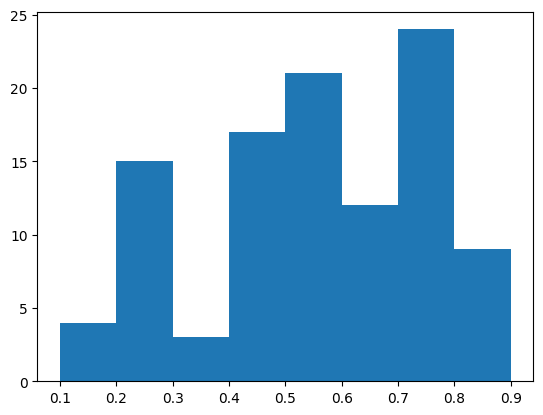

,genero,idade,curso,periodo,satisfacao,abandono,animacao,descrente potencial,descrente estudos,possui dificuldade,score,score_range,exaustao_emocional,descrenca,satisfacao_pessoal
0,Masculino,de 21 a 25,Ciência da Computação,7,3,5,2,2,2,2,0.416667,0.4,0.625,0.25,0.375
1,Masculino,de 16 a 20,Ciência da Computação,7,1,2,1,4,2,1,0.208333,0.2,0.125,0.50,0.000
2,Masculino,de 21 a 25,Ciência da Computação,7,2,1,1,2,2,2,0.166667,0.1,0.125,0.25,0.125
3,Masculino,de 26 a 30,Ciência da Computação,6,4,3,3,2,2,2,0.416667,0.4,0.375,0.25,0.625
4,Masculino,de 21 a 25,Ciência da Computação,7,1,2,4,6,4,2,0.541667,0.5,0.250,1.00,0.375


In [39]:
import matplotlib.pyplot as plt

plt.hist(df['score'], bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.show()

df.head()

In [99]:
print(min(df['score']))
print(max(df['score']))
print(sum(df['score'])/len(df))
df.head()

0.08333333333333333
0.9583333333333334
0.5688244047619048


,genero,idade,curso,periodo,satisfacao,abandono,animacao,descrente potencial,descrente estudos,possui dificuldade,score,score_range
0,Masculino,de 21 a 25,Ciência da Computação,7,3,5,2,2,2,2,0.416667,0.4
1,Masculino,de 16 a 20,Ciência da Computação,7,1,2,1,4,2,1,0.208333,0.2
2,Masculino,de 21 a 25,Ciência da Computação,7,2,1,1,2,2,2,0.166667,0.1
3,Masculino,de 26 a 30,Ciência da Computação,6,4,3,3,2,2,2,0.416667,0.4
4,Masculino,de 21 a 25,Ciência da Computação,7,1,2,4,6,4,2,0.541667,0.5


In [27]:
df['exaustao_emocional'] = [score(row[['abandono', 'possui dificuldade']]) for _, row in df.iterrows()]
df['descrenca'] = [score(row[['descrente potencial', 'descrente estudos']]) for _, row in df.iterrows()]
df['satisfacao_pessoal'] = [score(row[['satisfacao', 'animacao']]) for _, row in df.iterrows()]
df.head()

,genero,idade,curso,periodo,satisfacao,abandono,animacao,descrente potencial,descrente estudos,possui dificuldade,score,score_range,exaustao_emocional,descrenca,satisfacao_pessoal
0,Masculino,de 21 a 25,Ciência da Computação,7,3,5,2,2,2,2,0.416667,0.4,0.625,0.25,0.375
1,Masculino,de 16 a 20,Ciência da Computação,7,1,2,1,4,2,1,0.208333,0.2,0.125,0.50,0.000
2,Masculino,de 21 a 25,Ciência da Computação,7,2,1,1,2,2,2,0.166667,0.1,0.125,0.25,0.125
3,Masculino,de 26 a 30,Ciência da Computação,6,4,3,3,2,2,2,0.416667,0.4,0.375,0.25,0.625
4,Masculino,de 21 a 25,Ciência da Computação,7,1,2,4,6,4,2,0.541667,0.5,0.250,1.00,0.375


In [110]:

def avg_aspect(p, aspect):
    selection = df.query(f'periodo == {p}')[['score_range', 'score', 'satisfacao', 'animacao', 'possui dificuldade', 'descrente potencial', 'descrente estudos', 'abandono', 'exaustao_emocional', 'descrenca', 'satisfacao_pessoal']]
    media = sum(selection[aspect])/max(1, len(selection))
    return media

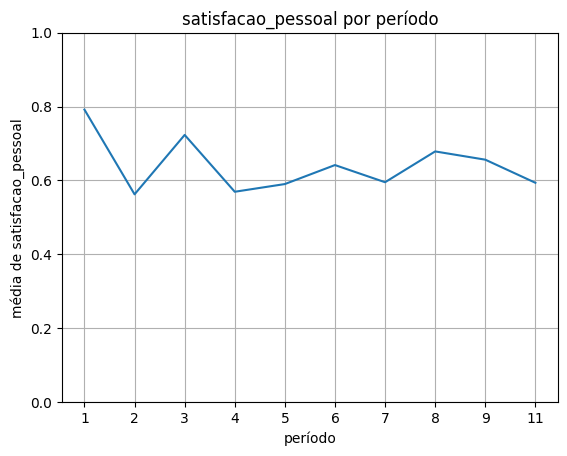

In [113]:
aspect = 'satisfacao_pessoal'
x = [str(i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 11]]
y = [avg_aspect(p, aspect) for p in x]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='período', ylabel=f'média de {aspect}', title=f'{aspect} por período')
ax.grid()
plt.ylim(0, 1)
plt.show()

In [47]:
from sklearn.preprocessing import OneHotEncoder

AGE_SCALE = {
       'de 16 a 20': 1,
       'de 21 a 25': 2,
       'de 26 a 30': 3,
       'de 31 a 35': 4,
       '36 ou mais': 5,
}

encoder = OneHotEncoder()
one_hot_encoded = df.copy()

# cursos = pd.DataFrame(encoder.fit_transform(df[['curso']]).toarray())
# cursos.columns = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
# one_hot_encoded = one_hot_encoded.join(cursos)

# generos = pd.DataFrame(encoder.fit_transform(df[['genero']]).toarray())
# generos.columns = ['g0', 'g1', 'g2', 'g3']
# one_hot_encoded = one_hot_encoded.join(generos)

one_hot_encoded['idade'] = [AGE_SCALE[a] for a in one_hot_encoded['idade']]

one_hot_encoded = one_hot_encoded.drop(['genero', 'curso', 'satisfacao', 'abandono',
       'animacao', 'descrente potencial', 'descrente estudos',
       'possui dificuldade', 'score_range'], axis=1)

one_hot_encoded.head()

,idade,periodo,score,exaustao_emocional,descrenca,satisfacao_pessoal
0,2,7,0.416667,0.625,0.25,0.375
1,1,7,0.208333,0.125,0.50,0.000
2,2,7,0.166667,0.125,0.25,0.125
3,3,6,0.416667,0.375,0.25,0.625
4,2,7,0.541667,0.250,1.00,0.375


In [29]:
from sklearn.cluster import MiniBatchKMeans
import altair as alt

data_matrix = [list(row.values) for _, row in one_hot_encoded.iterrows()]

# escolhendo k
qualidade = pd.DataFrame(columns = ['k', 'ssd'])
for k in range(1,17, 1):
  # kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20)
  kmeans.fit(data_matrix)
  qualidade = qualidade.append({'k': k, 'ssd' : kmeans.inertia_}, ignore_index=True)

alt.Chart(qualidade).mark_line(
    point=True
).encode(
    x = 'k',
    y = alt.Y('ssd', scale = alt.Scale(zero=False))
)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_2996/3223013163.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qualidade = qualidade.append({'k': k, 'ssd' : kmeans.inertia_}, ignore_index=True)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_2996/3223013163.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qualidade = qualidade.append({'k': k, 'ssd' : kmeans.inertia_}, ignore_index=True)
/usr/local/lib/python3.8/d

alt.Chart(...)

In [49]:
kmeans = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20)
kmeans.fit(data_matrix)
labels = kmeans.predict(data_matrix)

one_hot_encoded = one_hot_encoded.assign(grupo = labels)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
one_hot_encoded

,idade,periodo,score,exaustao_emocional,descrenca,satisfacao_pessoal,c0,c1,c2,c3,...,c5,c6,c7,c8,c9,g0,g1,g2,g3,grupo
0,2,7,0.416667,0.625,0.250,0.375,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,1,7,0.208333,0.125,0.500,0.000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,2,7,0.166667,0.125,0.250,0.125,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,3,6,0.416667,0.375,0.250,0.625,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,2,7,0.541667,0.250,1.000,0.375,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,9,0.583333,0.750,0.375,0.625,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
108,1,1,0.833333,0.750,0.750,1.000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
109,1,7,0.291667,0.125,0.125,0.625,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
110,2,5,0.708333,0.875,0.500,0.750,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [35]:
one_hot_encoded.to_csv('grouped.csv')

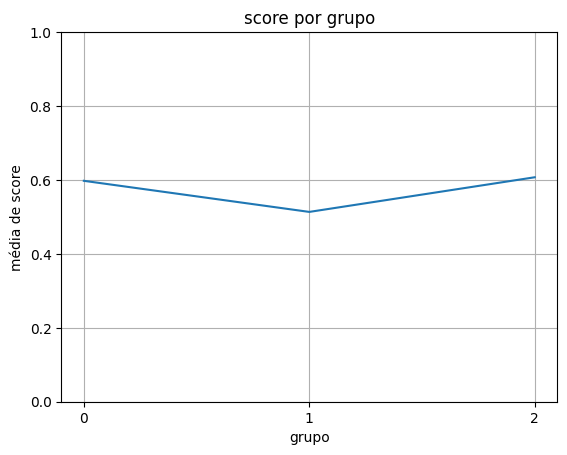

In [51]:
def avg_aspect(p, aspect):
    selection = one_hot_encoded.query(f'grupo == {p}')
    media = sum(selection[aspect])/max(1, len(selection))
    return media

aspect = 'score'
x = [str(i) for i in [0, 1, 2]]

y = [avg_aspect(p, aspect) for p in x]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='grupo', ylabel=f'média de {aspect}', title=f'{aspect} por grupo')
ax.grid()
plt.ylim(0, 1)
plt.show()